In [1]:
%matplotlib inline
from copy import deepcopy
from pam.read import read_matsim
from pam.core import Population, Household, Person
from pam.activity import Plan, Activity, Leg, PlanComponent
from pam.utils import minutes_to_datetime as mtdt
from pam.variables import END_OF_DAY

In [2]:
#test optimisation of basic hwh trip
from matplotlib import pyplot as plt
from pam.optimise.random import reschedule
from pam.optimise.grid import grid_search

In [3]:
from pam.scoring import CharyparNagelPlanScorer

default_config = {
    'mUM': 1,
    'utilityOfLineSwitch': -1,
    'performing': 6,
    'waiting': 0,
    'waitingPt': -2,
    'lateArrival': -18,
    'earlyDeparture': -0,
    'work': {
        'typicalDuration': '08:30:00',
        # 'openingTime': '06:00:00',
        # 'closingTime': '20:00:00',
        # 'latestStartTime': '09:30:00',
        # 'earliestEndTime': '16:00:00',
        "minimalDuration": "08:00:00"
        },
    'home': {
        'typicalDuration': '12:00:00',
        "minimalDuration": "08:00:00"
        },
    'shop': {
        'typicalDuration': '00:30:00',
        "minimalDuration": "00:10:00"
        },
    'education': {
        'typicalDuration': '08:30:00',
        "minimalDuration": "06:00:00"
        },
    'car': {
        # 'constant': -0,
        # 'dailyMonetaryConstant': -0,
        # 'dailyUtilityConstant': -0,
        # 'marginalUtilityOfDistance': -0,
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.0005
        },
    'pt': {
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'bus': {
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'train': {
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'walk': {
        'marginalUtilityOfTravelling': -12,
        },
    'bike': {
        'marginalUtilityOfTravelling': -12,
        }
    }

config = {subpop: default_config for subpop in [
    "default", "high income", "medium income", "low income", "freight"
    ]}

scorer = CharyparNagelPlanScorer(cnfg=config)

In [4]:
personA = Person('A', attributes={'age': 20, 'subpopulation': 'default'})

personA.plan.day = [
    Activity(act='home', area=1, start_time=mtdt(0), end_time=mtdt(1000)),
    Leg(mode='car', start_area=1, end_area=2, start_time=mtdt(1000), end_time=mtdt(1100), distance=1000),
    Activity(act='work', area=2, start_time=mtdt(1100), end_time=mtdt(1200)),
    Leg(mode='car', start_area=2, end_area=1, start_time=mtdt(1200), end_time=mtdt(1300), distance=1000),
    Activity(act='home', area=1, start_time=mtdt(1300), end_time=END_OF_DAY)
]

personA.validate()

True

60.02156826508201


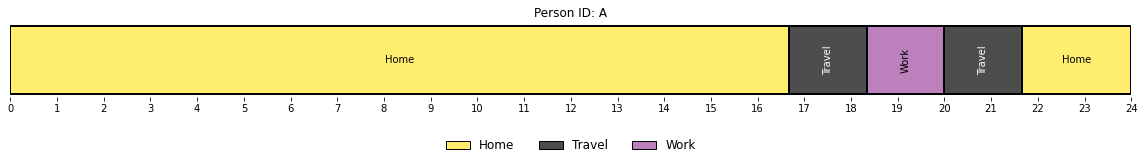

In [5]:
personA.plot()
print(scorer.score_person(personA))

Initial best score at iteration 0: -34.13968450090408
New best score at iteration 0: 87.18494528440392
New best score at iteration 2: 96.92874808783088
New best score at iteration 8: 103.28923611120935
New best score at iteration 38: 103.46027652281514
New best score at iteration 42: 103.73007764614313
New best score at iteration 71: 103.95609111613717
    iteration        d0        d1         d2       score
0           1  3.308056  3.631111  13.727500   87.184945
1           2  2.696667  3.131389  14.838611   81.715449
2           3  1.511111  4.905556  14.250000   96.928748
3           4  5.656944  2.418056  12.591667   71.213815
4           5  1.170556  2.222778  17.273333   68.316418
..        ...       ...       ...        ...         ...
95         96  0.581944  6.210000  13.874722  102.734094
96         97  4.450278  0.202222  16.014167   37.891878
97         98  4.076111  4.187500  12.403056   92.064960
98         99  1.590278  4.434444  14.641944   93.900077
99        100  4.8

c:\users\alex.kaye\pam\pam\optimise\random.py:102: UserWarning:

No contour levels were found within the data range.



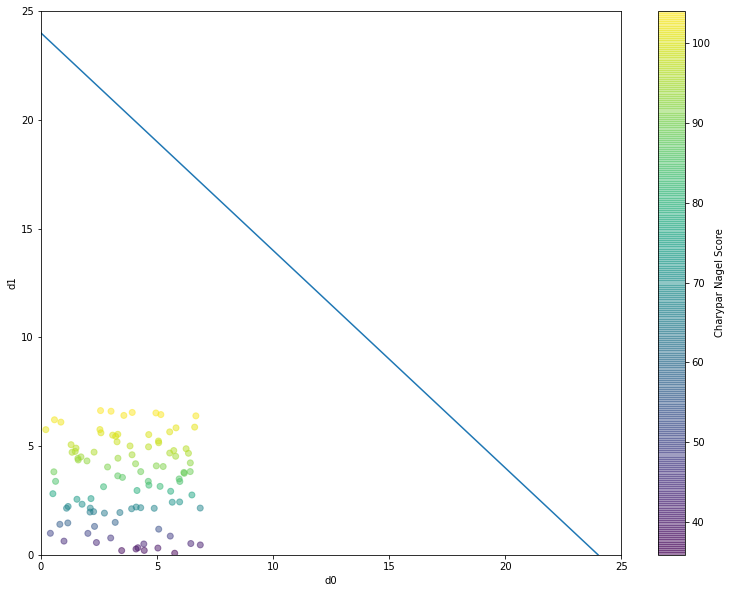

In [9]:
plan, log = reschedule(
    personA.plan,
    plans_scorer=scorer,
    config=config['default'],
    patience=100
    )

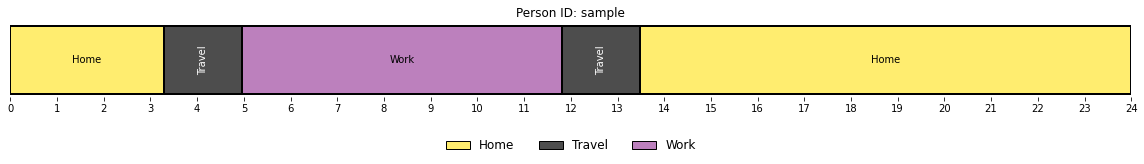

In [7]:
plan.plot()

106.32365571204551


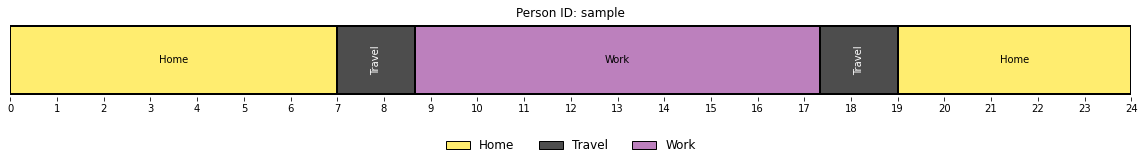

In [8]:
best_score, best_plan = grid_search(
    personA.plan, scorer, config["default"], step=900
    )
best_plan.validate()
print(best_score)
best_plan.plot()